In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#missingno
import missingno as msn
#re
import re
#sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# read the csv data file
data_path = '/home/james/Desktop/home/train.csv'
data = pd.read_csv(data_path)

In [3]:
# determing the shape of the data
data.shape

(7613, 5)

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


## Data Exploration

##### Missing data

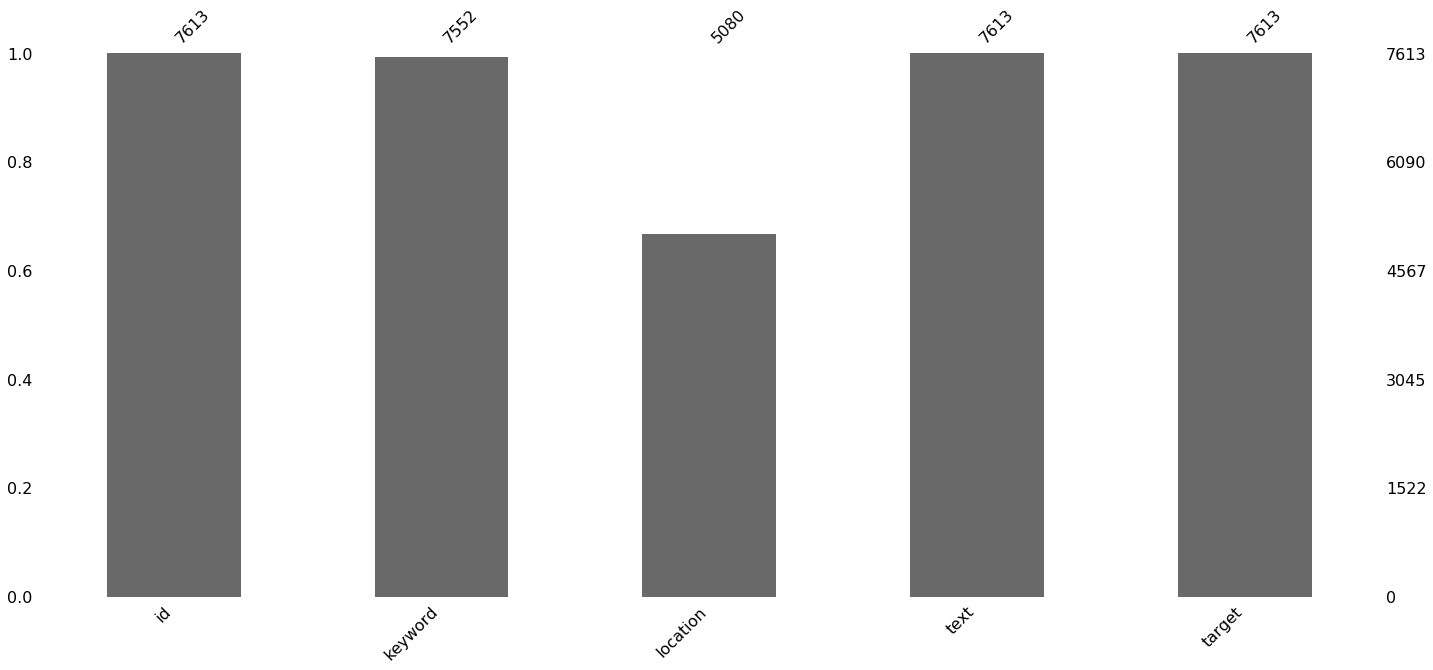

In [6]:
# use missingno bar and matrix to determine features with missing value
msn.bar(data)

#### From the above bar, keyword and location has missing data

In [8]:
#drop the id, location and keyword columns from the dataset
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [11]:
data = data.drop(['id', 'keyword','location'], axis = 1)

In [13]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## Basic NLP techniques

#### Steps
##### 1. Remove unwanted words
##### 2. Transform text into lower case
##### 3. Remove stopwords
##### 4. Stemming or lemmatization
##### 5. create a sparse matrix(bag of words)

In [20]:
corpus =[]
stemmer = PorterStemmer()

for i in range(data['text'].shape[0]):
    #remove unwanted words
    tweet = re.sub('[^a-zA-Z]',' ',data['text'][i])
    #Transform to lowercase
    tweet = tweet.lower()
    tweet = tweet.split()
    # remove stopwords
    tweet = [stemmer.stem(word) for word in tweet if word not in set(stopwords.words('english')) ]
    tweet =' '.join(tweet)
    
    #append the tweet to the corpus
    corpus.append(tweet)

In [21]:
# exploring the corpus to determine between raw data and clean data
print (pd.DataFrame(corpus)[0].head(10))

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
5    rockyfir updat california hwi close direct due...
6    flood disast heavi rain caus flash flood stree...
7                               top hill see fire wood
8               emerg evacu happen build across street
9                             afraid tornado come area
Name: 0, dtype: object


In [25]:
raw_data = data['text'].head(10)
clean_data = pd.DataFrame(corpus, columns=['clean Data']).head(10)
frames = [raw_data, clean_data]
result = pd.concat(frames, axis=1, sort = False)
result

,text,clean Data
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi alaska smoke wildfir pour ...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfir updat california hwi close direct due...
6,#flood #disaster Heavy rain causes flash flood...,flood disast heavi rain caus flash flood stree...
7,I'm on top of the hill and I can see a fire in...,top hill see fire wood
8,There's an emergency evacuation happening now ...,emerg evacu happen build across street
9,I'm afraid that the tornado is coming to our a...,afraid tornado come area


In [36]:
# removing the less frequent words by creating a bag of words

# create a dictionary
uniqueWordFrequents = {}
for tweet in corpus:
    for word in tweet.split():
        if(word in uniqueWordFrequents.keys()):
            uniqueWordFrequents[word] += 1
        else:
            uniqueWordFrequents[word] = 1
#convert the dictionary to a dataframe
uniqueWordFrequents = pd.DataFrame.from_dict(uniqueWordFrequents,orient='index',columns=['Word Frequent'])
uniqueWordFrequents.sort_values(by=['Word Frequent'], inplace=True, ascending=False)
uniqueWordFrequents.head(10)
        

,Word Frequent
co,4746
http,4721
like,411
fire,363
amp,344
get,311
bomb,239
new,228
via,220
u,216


In [38]:
uniqueWordFrequents['Word Frequent'].unique()

array([4746, 4721,  411,  363,  344,  311,  239,  228,  220,  216,  213,
        210,  209,  201,  183,  181,  180,  178,  175,  169,  166,  164,
        162,  156,  155,  153,  151,  145,  144,  143,  137,  133,  132,
        131,  130,  129,  128,  125,  124,  123,  122,  121,  120,  119,
        118,  117,  116,  114,  111,  110,  109,  108,  106,  105,  104,
        103,  102,  101,  100,   99,   98,   97,   96,   95,   94,   93,
         91,   90,   89,   88,   87,   86,   84,   83,   82,   79,   78,
         77,   76,   75,   74,   73,   72,   71,   70,   69,   68,   67,
         66,   65,   64,   63,   62,   61,   60,   59,   58,   57,   56,
         55,   54,   53,   52,   51,   50,   49,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   39,   38,   37,   36,   35,   34,
         33,   32,   31,   30,   29,   28,   27,   26,   25,   24,   23,
         22,   21,   20,   19,   18,   17,   16,   15,   14,   13,   12,
         11,   10,    9,    8,    7,    6,    5,   

In [43]:
# Get words that repeated 20 or more times
uniqueWordFrequents = uniqueWordFrequents[uniqueWordFrequents['Word Frequent'] >=20]
print (uniqueWordFrequents.shape)
uniqueWordFrequents

(787, 1)


,Word Frequent
co,4746
http,4721
like,411
fire,363
amp,344
...,...
cnn,20
gem,20
captur,20
arriv,20


### Create the sparse matrix(Bag of Words)

In [46]:
countVec = CountVectorizer(max_features = uniqueWordFrequents.shape[0])
bagOfWords = countVec.fit_transform(corpus).toarray()

## Model Building

### Naive Bayes 
#### procedure
##### 1. create the x, y training and test
##### 2. train the model
##### 3. fit the model
##### 4. predict the output


In [69]:
# create the x, y training and test
X = bagOfWords
y = data['target']

print("the shape of x", X.shape)
print("the shape of y", y.shape)
 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=55, shuffle = True)


the shape of x (7613, 787)
the shape of y (7613,)


In [70]:
# init the gaussian model
model = GaussianNB()


In [74]:
# train the model
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
# predict outputs
pred = model.predict(X_test)

In [76]:
print(pred)

[0 0 0 ... 0 1 0]


In [72]:
# init MultinomialNB
Mult_model = MultinomialNB()

In [73]:
Mult_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
Mult_model.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0])

In [83]:
train_score =  ("train score is: ", model.score(X_train, y_train))
train_score

('train score is: ', 0.7893267651888342)

In [84]:
test_score = model.score(X_test, y_test)

In [94]:
print ("The test score using the GaussianNB model is: ", test_score)

The test score using the GaussianNB model is:  0.7669074195666448


#### decision tree classifier

In [95]:
# init the decision tree classifier
D_tree = DecisionTreeClassifier()

In [96]:
# train the model
D_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
# predict the outcome
D_tree.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0])

## Model evaluation

In [87]:
# Evaluating the multinomial model
train_score_MM = Mult_model.score(X_train, y_train)

In [89]:
# printing the score
print ("The train score for the multinomial model is: " ,train_score_MM)

The train score for the multinomial model is:  0.8032840722495895


In [90]:
test_score_MM = Mult_model.score(X_test, y_test)

In [91]:
# printing the test score
print ("The test score for the multinomial model is: ", test_score_MM)

The test score for the multinomial model is:  0.7734734077478661


#### DecisionTreeClassifier evaluation

In [98]:
train_score_DT = D_tree.score(X_train, y_train)

In [100]:
# printing the score
print (" The train score for DecisionTreeClassifier is: ", train_score_DT)

 The train score for DecisionTreeClassifier is:  0.9761904761904762


In [101]:
test_score_DT = D_tree.score(X_test,y_test)
#print the score
print ("The test score for the DecisionTreeClassifier is: ", test_score_DT)

The test score for the DecisionTreeClassifier is:  0.7419566644780039


#### GaussianNB evaluation

In [102]:
train_score_G = model.score(X_train,y_train)
print ("The train score for GaussianNB is: ", train_score_G)

The train score for GaussianNB is:  0.7893267651888342


In [103]:
test_score_G = model.score(X_test, y_test)
print ("The test score for GaussianNB is: ", test_score_G)

The test score for GaussianNB is:  0.7669074195666448
